<a href="https://colab.research.google.com/github/salmonin-o3o/ESAA_study/blob/main/250516_markdown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

딥러닝 파이토치 교과서

# 4장. 딥러닝 시작
## 4.1 인공 신경망의 한계와 딥러닝 출현

오늘날 인공 신경망에서 이용하는 구조는 퍼셉트론이라는 선형 분류기다. 퍼셉트론은 다수의 신호를 입력으로 받아 하나의 신호를 출력하는데, 이 신호를 입력으로 받아 '흐른다/안 흐른다(1 또는 0)'는 정보를 앞으로 전달하는 원리로 작동한다.

**AND 게이트**
AND 게이트는 모든 입력이 1일 때 작동한다.

**OR게이트**
OR 게이트는 입력에서 둘 중 하나만 1이거나 둘다 1일 때 작동한다.

**XOR 게이트**
XOR 게이트는 배타적 논리합이라는 용어로 입력 두 개 중 한 개만 1일 때 작동하는 논리 연산이다.

데이터가 비선형적으로 분리되기 때문에 단층 퍼셉트론에서는 학습이 불가능하다.

이때 다층 퍼셉트론, 심층 신경망, 딥러닝을 사용하면 된다.

## 4.2 딥러닝 구조
딥러닝이란 여러 층을 가진 인공 신경망을 사용하여 학습을 수행하는 것

### 4.2.1 딥러닝 용어
딥러닝은 다음 그림과 같이 입력층, 출력층과 두 개 이상의 은닉층으로 구성되어 있다.

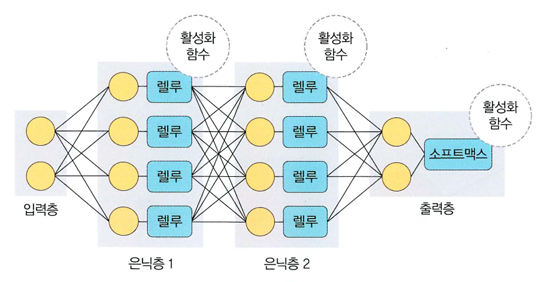



**가중치**
가중치는 입력 값이 연산 결과에 미치는 영향력을 조절하는 요소이다.

**가중합 또는 전달 함수**
각 노드에서 들어오는 신호에 가중치를 곱해서 다음 노드로 전달되는데, 이 값들을 모두 더한 합계를 가중합이라고 한다.

**활성화 함수**
전달 함수에서 전달받은 값을 출력할 때 일정 기준에 따라 출력 값을 변화시키는 비선형 함수이다.

- 시그모이드 함수
- 하이퍼볼릭 탄젠트 함수
- 렐루 함수
- 리키 렐루 함수
- 소프트맥스 함수

다음은 렐루 함수와 소프트맥스 함수를 파이토치에서 구현하는 코드이다.


In [ ]:
import torch

class Net(torch.nn.Module):
  def __init__(self, n_feature, n_hidden, n_output):
    super(Net, self).__init__()
    self.hidden = torch.nn.Linear(n_feature, n_hidden) # 은닉층
    self.relu = torch.nn.ReLU(inplace=True)
    self.out = torch.nn.Linear(n_hidden, n_output) # 출력층
    self.softmax = torch.nn.Softmax(dim=n_output)
  def forward(self, x):
    x = self.hidden(x)
    x = self.relu(x) # 은닉층을 위한 렐루 활성화 함수
    x = self.out(x)
    x = self.softmax(x) # 출력층을 위한 소프트맥스 활성화 함수
    return x

**손실 함수**
학습을 통해 얻은 데이터의 추정치가 실제 데이터와 얼마나 차이가 나는지 평가하는 지표라고 할 수 있다.

- 평균 제곱 오차
- 크로스 엔트로피 오파

### 4.2.2 딥러닝 학습
딥러닝 학습은 크게 순전파와 역전파라는 두 단계로 진행된다.

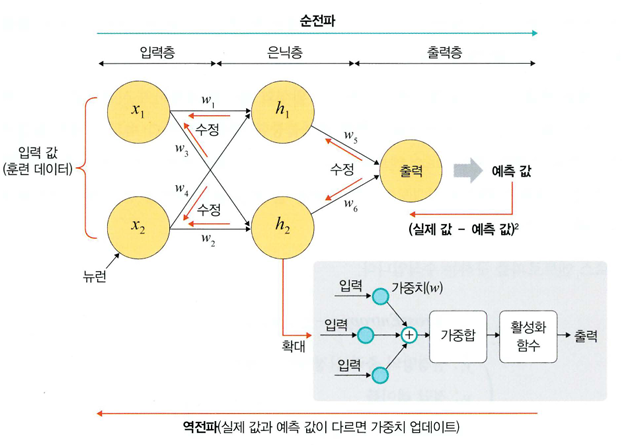

### 4.2.3 딥러닝의 문제점과 해결 방안
딥러닝의 핵심은 활성화 함수가 적용된 여러 은닉층을 결합하여 비선형 영역을 표현하는 것이다. 그러나 은닉층이 많을수록 다음 세 가지 문제점이 생긴다.

**과적합 문제 발생**
과적합은 훈련 데이터에 대해 과하게 학습하여 실제 데이터에 대한 오차가 증가하는 현상을 의미한다. 과적합을 해결하는 방법으로 드롭아웃이 있다. 신경망 모델이 과적합되는 것을 피하기 위한 방법으로, 학습 과정 중 임의로 일부 노드들을 학습에서 제외시킨다.

다음은 파이토치에서 드롭아웃을 구현하는 예시 코드이다.

In [ ]:
class DropoutModel(torch.nn.Module):
  def __init__(self):
    super(DropoutModel, self).__init__()
    self.layer1 = torch.nn.Linear(784, 1200)
    self.dropout1 = torch.nn.Dropout(0.5) # 50%의 노드를 무작위로 선택하여 사용하지 않겠다는 의미
    self.layer2 = torch.nn.Linear(1200, 1200)
    self.dropout2 = torch.nn.Dropout(0.5)
    self.layer3 = torch.nn.Linear(1200, 10)

  def forward(self, x):
    x = F.relu(self.layer1(x))
    x = self.dropout1(x)
    x = F.relu(self.layer2(x))
    x = self.dropout2(x)
    return self.layer3(x)

**기울기 소멸 문제 발생**
은닉층이 많은 신경망에서, 출력층에서 은닉층으로 전달되는 오차가 크게 줄어들어 학습이 되지 않는 현상이다. 즉, 기울기가 소멸되기 때문에 학습되는 양이 0에 가까워져 학습이 더디게 진행되다 오차를 더 줄이지 못하고 그 상태로 수렴하는 현상이다.

이 문제는 시그모이드나 하이퍼볼릭 탄젠트 대신 렐루 활성화 함수를 사용하면 해결할 수 있다.

**성능이 나빠지는 문제 발생**
경사 하강법은 손실 함수의 비용이 최소가 되는 지점을 찾을 때까지 기울기가 낮은 쪽으로 계속 이동시키는 과정을 반복하는데, 이때 성능이 나빠지는 문제가 발생한다.

이 문제는 확률적 경사 하강법과 미니 배치 경사 하강법을 사용한다.

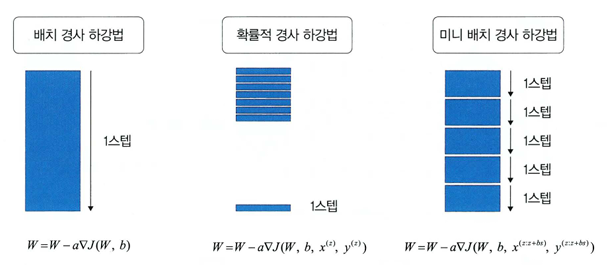

*배치 경사 하강법*
전체 데이터셋에 대한 오류를 구한 후 기울기를 한 번만 계산하여 모델의 파라미터를 업데이트하는 방법이다.

*확률적 경사 하강법*
임의로 선택한 데이터에 대해 기울기를 계산하는 방법으로 적은 데이터를 사용하므로 빠른 계산이 가능하다.

*미니 배치 경사 하강법*
전체 데이터셋을 미니 배치 여러 개로 나누고, 미니 배치 한 개마다 기울기를 구한 후 그것의 평균 기울기를 이용하여 모델을 업데이트해서 학습하는 방법이다.

파이토치에서는 다음과 같이 구현할 수 있다.

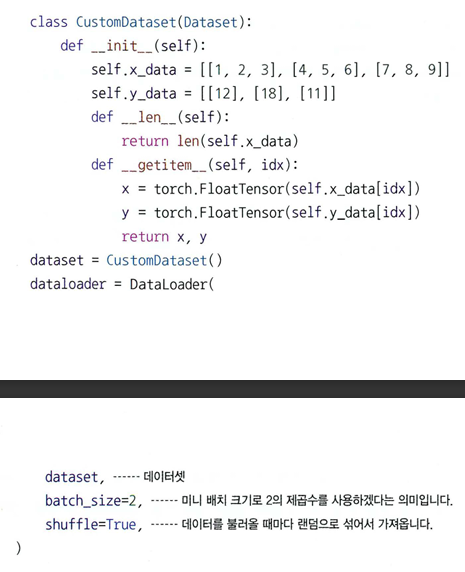

+) 옵티마이저
- 속도를 조정하는 방법:
  *아다그라드 /*
  *아다델타 /*
  *알엠에스프롭*
- 운동량을 조정하는 방법:
  *모멘텀 /*
  *네스테로프 모멘텀*
- 속도와 운동량에 대한 혼용 방법:
  *아담*

### 4.2.4 딥러닝을 사용할 때 이점
**특성 추출**
데이터별로 어떤 특징을 가지고 있는지 찾아내고, 그것을 토대로 데이터를 벡터로 변환하는 작업을 특성 추출이라고 한다.
**빅데이터의 효율적 활용**
딥러닝에서는 특성 추출을 알고리즘에 통합시켰다. 이것이 가능한 이유는 빅데이터 때문이다. 딥러닝 학습을 이용한 특성 추출은 데이터 사례가 많을수록 성능이 향상되기 때문이다.

## 4.3 딥러닝 알고리즘
딥러닝 알고리즘은 심층 신경망을 사용한다는 공통점이 있다. 머신 러닝 알고리즘처럼 목적에 따라 합성곱 신경망, 순환 신경망, 제한된 볼츠만 머신, 심픙 신뢰 신경망으로 분류된다.

### 4.3.1 심층 신경망
DNN은 입력층과 출력층 사이에 다수의 은닉층을 포함하는 인공 신경망이다.

### 4.3.2 합성곱 신경망
CNN은 합성곱층과 풀링층을 포함하는 이미지 처리 성능이 좋은 인공 신경망 알고리즘이다.

기존신경망과 비교하여 다음과 같은 차별성이 있다.

- 각 층의 입출력 형상을 유지한다.
- 이미지의 공간 정보를 유지하면서 인접 이미지와 차이가 있는 특징을 효과적으로 인식한다.
- 복수 필터로 이미지의 특징을 추출하고 학습한다.
- 추출한 이미지의 특징을 모으고 강화하는 풀링층이 있다.
- 필터를 공유 파라미터로 사용하기 때문에 일반 인공 신경망과 비교하며 학습 파라미터가 매우 적다.

### 4.3.3 순환 신경망
RNN은 시계열 데이터 같은 시간 흐름에 따라 변화하는 데이터를 학습하기 위한 인공 신경망이다.

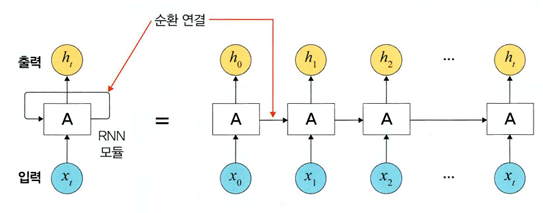

순환 신경망의 특징은 다음과 같다.

- 시간성을 가진 데이터가 많다.
- 시간성 정보를 이용하여 데이터의 특징을 잘 다룬다.
- 시간에 따라 내용이 변하므로 데이터는 동적이고, 길이가 가변적이다.
- 매우 긴 데이터를 처리하는 연구가 활발히 진행되고 있다.

순환 신경망은 기울기 소멸 문제로 학습이 제대로 되지 않는 문제가 있다. 이를 해결하고자 메모리 개념을 도입한 LSTM이 순환 신경망에서 많이 사용되고 있다.

### 4.3.4 제한된 볼츠만 머신
볼츠만 머신은 가시층과 은닉층으로 구성된 모델이다. 이 모델에서 가시층은 은닉층과만 연결된다.

제한된 볼츠만 머신의 특징은 다음과 같다.

- 차원 감소, 분류, 선형 회귀 분석, 협업 필터링, 특성 값 학습, 주제 모델링에 사용한다.
- 기울기 소멸 문제를 해결하기 위해 사전 학습 용도로 활용 가능하다.
- 심층 신뢰 신경망의 요소로 활용된다.

### 4.3.5 심층 신뢰 신경망
심층 신뢰 신경망은 사전 훈련된 제한된 볼츠만 머신을 층층이 쌓아 올린 구조로, 레이블 없는 데이터에 대한 비지도 학습이 가능하다.

1. 가시층과 은닉층 1에 제한된 볼츠만 머신을 사전 훈련한다.
2. 첫 번째 층 입력 데이터와 파라미터를 고정하여 두 번째 층 제한된 볼츠만 머신을 사전 훈련한다.
3. 원하는 층 개수만큼 제한된 볼츠만 머신을 쌓아 올려 전체 DBN을 완성한다.

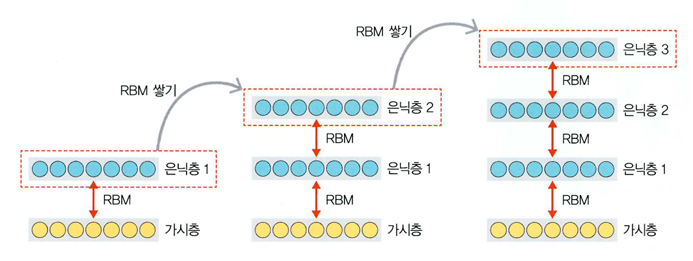

심층 신뢰 신경망의 특징은 다음과 같다.
- 순차적으로 심층 신회 신경망을 학습시켜 가면서 계층적 구조를 생성한다.
- 비지도 학습으로 학습한다.
- 위로 올라갈수록 추상적 특성을 추출한다.
- 학습된 가중치를 다층 퍼셉트론의 가중치 초깃값으로 사용한다.

## 4.4 우리는 무엇을 배워야 할까?
머신 러닝을 학습할지, 딥러닝을 학습할지는 주어진 데이터를 활용하여 어떤 결과를 얻고 싶은지에 따라 다르다.